# Real Estate Valuation System - King County
## Project Overview

### Objectives
🎯 EXPECTED RESULTS:

**FOR THE CLIENT/COMPANY:**
- 📈 Which features most increase the property value?
- 🏡 Profile of premium properties: What do they have in common?
- 💰 Price prediction: How much is a property with X characteristics worth?
- 📍 Geographic analysis: Where are the most valued properties located?

**FOR YOUR LEARNING:**
- ✅ Apply the entire ML flow we learned
- ✅ Work with real real estate market data
- ✅ Create a complete project for your portfolio
- ✅ Present results professionally

### Questions We Will Answer
- "How much does the price increase per additional square meter?"
- "Is the water view really worth it?"
- "What is the impact of location (ZIP code) on the price?"
- "What differentiates a property worth $650K+ from others?"
- "Can we predict the price with good accuracy?"

### Project Summary
🚀 YOU WILL BUILD...

A real estate valuation system that:
- ✅ Analyzes the King County market
- ✅ Identifies the most important price drivers
- ✅ Predicts prices of new properties
- ✅ Provides insights into premium properties

## About the Data

This dataset comprises one-year data (from May 2014 to May 2015) of house sale prices across King County, including Seattle. It features 21 different columns, providing a comprehensive overview of the real estate market:

- **id**: A unique identifier for a house.
- **date**: The date on which the house was sold.
- **price**: The sale price of the house (prediction target).
- **bedrooms**: Number of bedrooms in the house.
- **bathrooms**: Number of bathrooms in the house, per bedroom.
- **sqft_living**: Square footage of the interior living space.
- **sqft_lot**: Square footage of the land space.
- **floors**: Number of floors (levels) in the house.
- **waterfront**: Whether the house has a waterfront view.
- **view**: Number of times the house has been viewed.
- **condition**: The overall condition of the house.
- **grade**: The overall grade given to the house, based on the King County grading system.
- **sqft_above**: Square footage of the house apart from the basement.
- **sqft_basement**: Square footage of the basement.
- **yr_built**: The year the house was built.
- **yr_renovated**: The year the house was renovated.
- **zipcode**: ZIP code area.
- **lat**: Latitude coordinate.
- **long**: Longitude coordinate.
- **sqft_living15**: The interior living space for the nearest 15 neighbors in 2015.
- **sqft_lot15**: The land spaces for the nearest 15 neighbors in 2015.

## 1. Imports and Setup

In [797]:
# DATA MANIPULATION
import pandas as pd
import numpy as np

# VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# STATISTICS
from scipy import stats
from scipy.stats import norm, skew

# MACHINE LEARNING
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# UTILITIES
import warnings
warnings.filterwarnings('ignore')
import joblib
import json
from datetime import datetime

# VISUALIZATION SETTINGS
plt.style.use('seaborn-v0_8')
%matplotlib inline
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (8, 5)

## 2. Exploratory Data Analysis (EDA)

### 2.1 Reading the Data

In [798]:
df = pd.read_csv('/Users/mac/IronHacks/W5/Mini_Project_IronKaggle/king_country_houses_aa.csv')  # Load dataset

### 2.2 Initial Analysis

In [799]:
df.shape  # Check dataset dimensions

(21613, 21)

In [800]:
df.columns.tolist()  # List all column names

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [801]:
display(df.head())  # Show first few rows of the dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [802]:
df.tail()  # Show last few rows of the dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [803]:
df.describe()  # Statistical summary of numerical columns

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [804]:
df.info() # Overview of DataFrame structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [805]:
df['bathrooms'] # Cheking 'bathrooms' column

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21613, dtype: float64

In [806]:
df['floors'] # We have to transform this to int type

0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
21608    3.0
21609    2.0
21610    2.0
21611    2.0
21612    2.0
Name: floors, Length: 21613, dtype: float64

In [807]:
df.isnull().sum()  # Check for missing values in each column

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [808]:
df.isnull().sum().sum() # Total number of missing values in the DataFrame
# * There is no Missing Values

np.int64(0)

In [809]:
df.duplicated().sum()  # Check for duplicate rows
# * There is no Duplicated Values

np.int64(0)

### 2.3 Target Analysis

In [810]:
print("=" * 51)
print("|           🔍 Structure Data Analysis            |")
print("=" * 51)
print("|           🎯 Target Variable (price):           |")
print("=" * 51)
print(df['price'].value_counts()) # Frequency of each unique value in 'price' column
print('\n')
print("=" * 51)
print('\n')
print(f"Proportion: {df['price'].value_counts(normalize=True)}") # Proportion of each unique value in 'price' column

|           🔍 Structure Data Analysis            |
|           🎯 Target Variable (price):           |
price
450000.0     172
350000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
341780.0       1
1987500.0      1
504600.0       1
531155.0       1
819995.0       1
Name: count, Length: 4028, dtype: int64




Proportion: price
450000.0     0.007958
350000.0     0.007958
550000.0     0.007357
500000.0     0.007033
425000.0     0.006940
               ...   
341780.0     0.000046
1987500.0    0.000046
504600.0     0.000046
531155.0     0.000046
819995.0     0.000046
Name: proportion, Length: 4028, dtype: float64


### 2.4 Data Visualization

In [811]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns # Selecting numerical columns
cat_cols = df.select_dtypes(include=['object']).columns # Selecting categorical columns

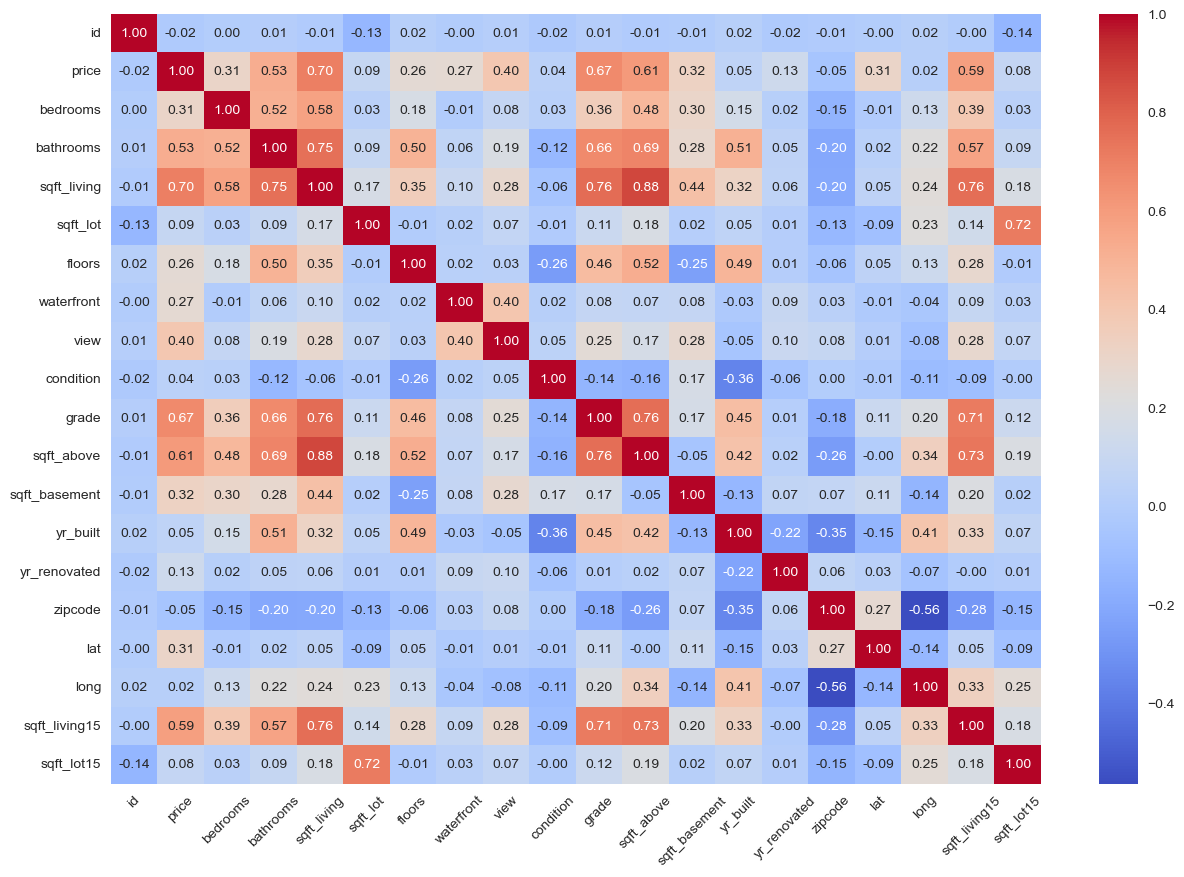

In [812]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[num_cols].corr(), # Correlation matrix
            annot=True, # Show correlation coefficients
            fmt=".2f", # Format for the coefficients
            cmap='coolwarm', # Color map
            )
plt.xticks(rotation=45)
plt.show()
# * 'grade' is a great candidate for predict analysis
# * 'sqft_living' is another one
# * new house > 2000

## 3. Outlier Detection and Treatment

### 3.1 Plots

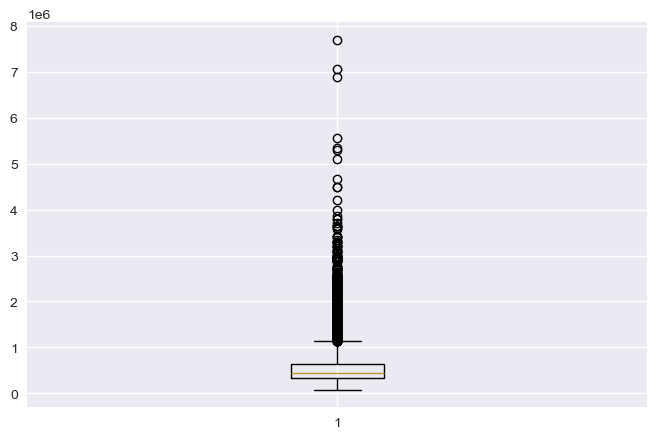

In [813]:
plt.boxplot(df['price'])
plt.show()

In [814]:
Q1= df["price"].quantile(0.25)
Q3= df["price"].quantile(0.75)
IQR= Q3- Q1

In [815]:
def outliers_iqr(df, target, Q1, Q3, IQR):  
  t = 1.5
  return df[(df[target] < Q1 - t * IQR) | (df[target] > Q3 + t * IQR)]

In [816]:
outliers= outliers_iqr(df, "price", Q1, Q3, IQR)
round(outliers["price"].describe().T, 2)

count       1146.00
mean     1667087.29
std       652335.78
min      1130000.00
25%      1260125.00
50%      1450000.00
75%      1813750.00
max      7700000.00
Name: price, dtype: float64

In [817]:
sorted_price = df.sort_values(by = 'price', ascending=False).head(100)
sorted_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,3377900195,20140929T000000,2525000.0,4,5.50,6930,45100,1.0,0,0,...,11,4310,2620,1950,1991,98006,47.5547,-122.144,2560,37766
17558,7631800015,20150407T000000,2510000.0,3,3.25,5480,57990,2.0,1,4,...,11,5480,0,1991,0,98166,47.4558,-122.371,2500,22954
4032,5700003585,20141229T000000,2500000.0,5,3.25,5620,12672,2.0,0,0,...,11,4140,1480,1916,0,98144,47.5786,-122.287,4470,8050
7506,9471200265,20150505T000000,2500000.0,4,3.25,3960,16224,2.0,0,2,...,12,3100,860,1938,0,98105,47.6701,-122.259,3960,15050


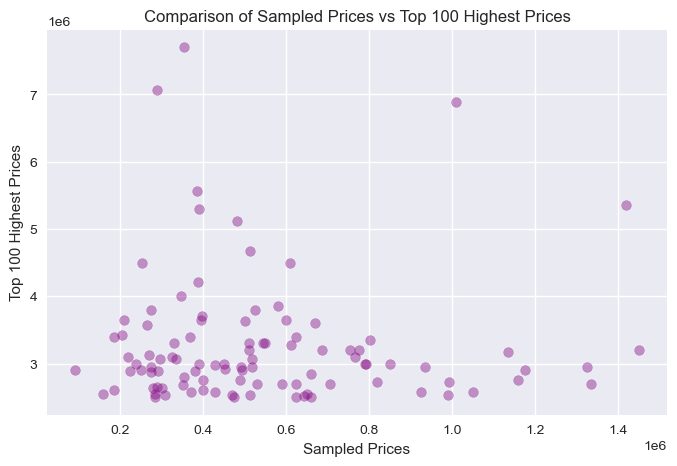

In [818]:
comp_price = df.sort_values(by = 'price').sample(100)
plt.scatter(comp_price['price'], sorted_price['price'], alpha = 0.4, color = 'purple')
plt.xlabel('Sampled Prices')
plt.ylabel('Top 100 Highest Prices')
plt.title('Comparison of Sampled Prices vs Top 100 Highest Prices')
plt.show()

In [819]:
mean_price = df['price'].mean()
std_price = df['price'].std()

df['z_score'] = (df['price'] - mean_price) / std_price

df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,-0.866697
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,-0.005688
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,-0.980827
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0.174086
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,-0.081956
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1.865598
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,-0.769728
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,-0.676164
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,-0.845996
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,-0.591316


In [820]:
# <>! AI GENERATED PLOT <>!
def plot_correlations(spearman_correlation, pearson_correlation):

  fig, axes = plt.subplots(1, 2, figsize=(20, 8))

  sns.heatmap(spearman_correlation, annot=True, fmt=".1f", cmap="magma", ax=axes[0])
  axes[0].set_title("Spearman Correlation")

  sns.heatmap(pearson_correlation, annot=True, fmt=".1f", cmap="magma", ax=axes[1])
  axes[1].set_title("Pearson Correlation")

  plt.tight_layout()
  plt.show()

In [821]:
target_cols= df.select_dtypes(include="number").drop(columns="id", errors="ignore").columns
target_cols

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'z_score'],
      dtype='object')

In [822]:
corr_spear= df[target_cols].corr(method="spearman")
corr_pear= df[target_cols].corr(method="pearson")

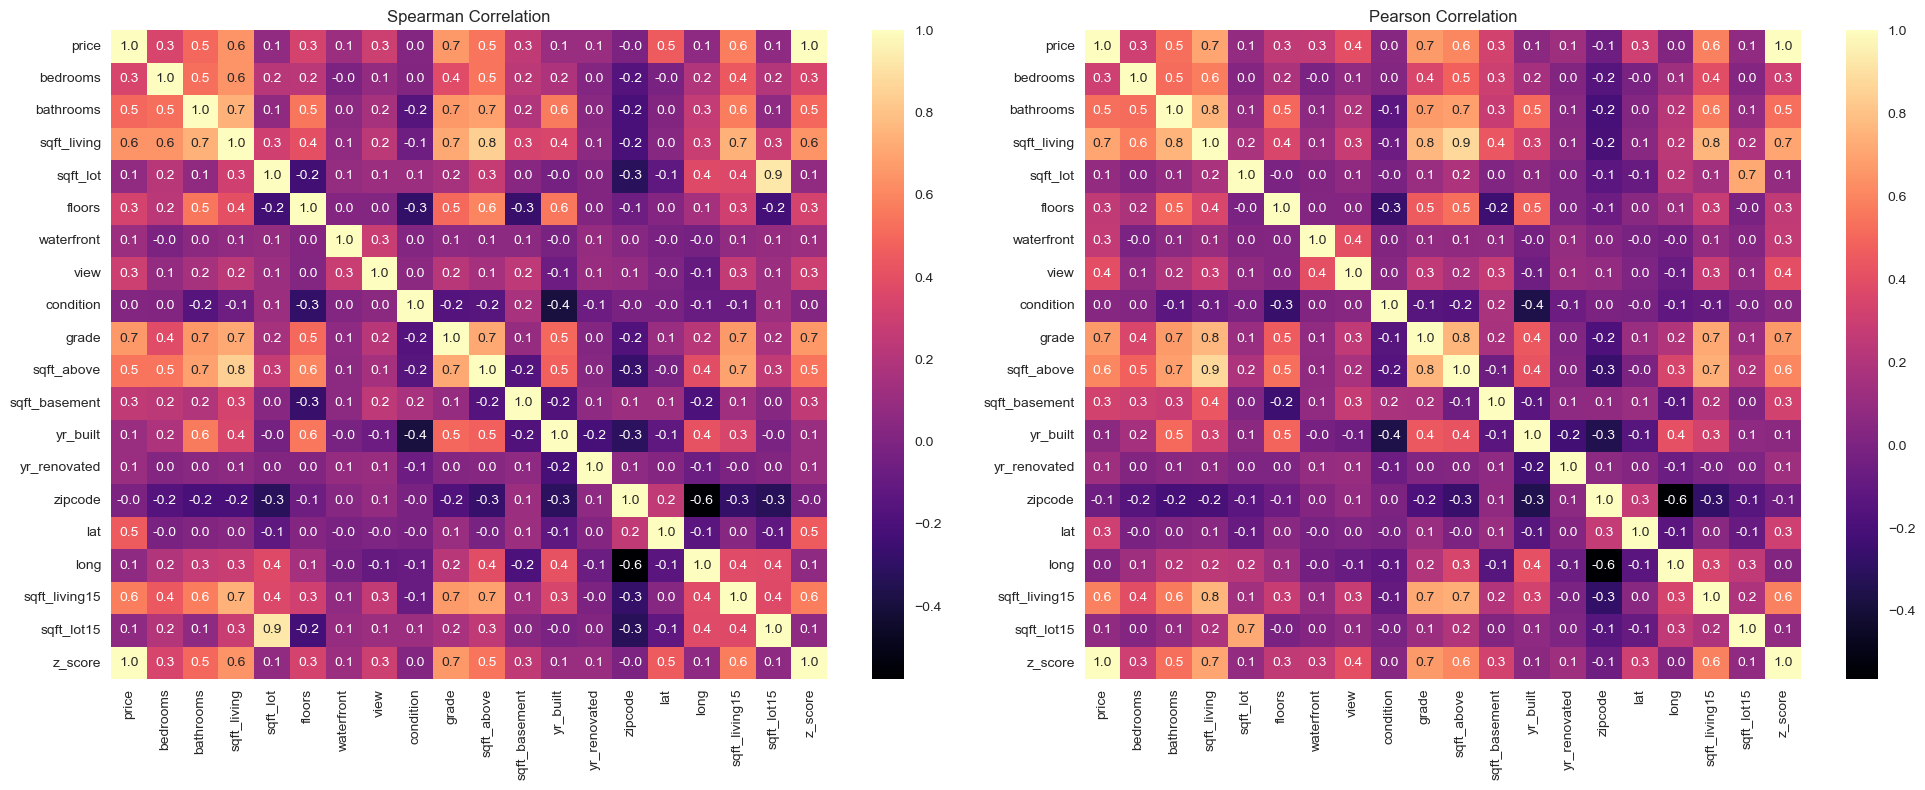

In [823]:
plot_correlations(corr_spear, corr_pear)

- **`grade`** appears to have the strongest and most consistent impact on `price`. This variable reflects the quality of construction, which makes sense: higher-quality homes are strongly associated with higher prices.

- **`sqft_living`** is the second most influential and robust predictor of `price`. It represents the habitable square footage of the house—larger living spaces generally command higher prices.

- **`sqft_living15`** (the average size of nearby houses) is also significantly correlated with `price`. This suggests that not only the house itself matters, but also its **neighborhood context**—homes in areas with larger houses tend to be more expensive.

- Both **`bathrooms`** and **`bedrooms`** influence `price`, but **`bathrooms`** shows a notably stronger correlation. This indicates that buyers place greater value on additional bathrooms than on extra bedrooms.

- **`view`** and **`waterfront`** are categorical (or discrete ordinal) variables, which explains the discrepancy between Pearson and Spearman correlations.  
  - **`waterfront`** has a strong *discrete* effect (waterfront properties are much more expensive), but it affects very few observations—so its rank-based correlation (Spearman) is low.  
  - **`view`** becomes impactful mainly at higher levels (e.g., `view ≥ 3`), confirming its non-linear, threshold-based influence.

- There is **high multicollinearity** between:
  - **`sqft_living`** and **`sqft_above`** (correlation > 0.84), so it’s advisable to keep only one (preferably `sqft_living` for interpretability).
  - **`sqft_living`** and **`sqft_living15`** (~0.75 correlation), which reflects that larger homes tend to be located in neighborhoods with other large homes—not necessarily redundancy, but contextual alignment.

- Variables like **`condition`**, **`yr_built`**, **`yr_renovated`**, **`zipcode`**, and **`lat`/`long`** show very weak or inconsistent correlations with `price`. They can likely be **excluded from a baseline predictive model** without significant loss of performance—unless used in more advanced spatial or categorical encodings.

---

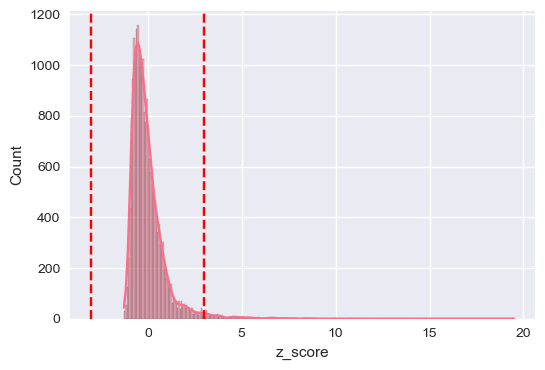

In [824]:
outliers_z = df[np.abs(df['z_score']) > 2.5]

plt.figure(figsize=(6,4))
sns.histplot(df["z_score"], kde=True)
plt.axvline(3, color='red', linestyle='--')
plt.axvline(-3, color='red', linestyle='--')
plt.show()

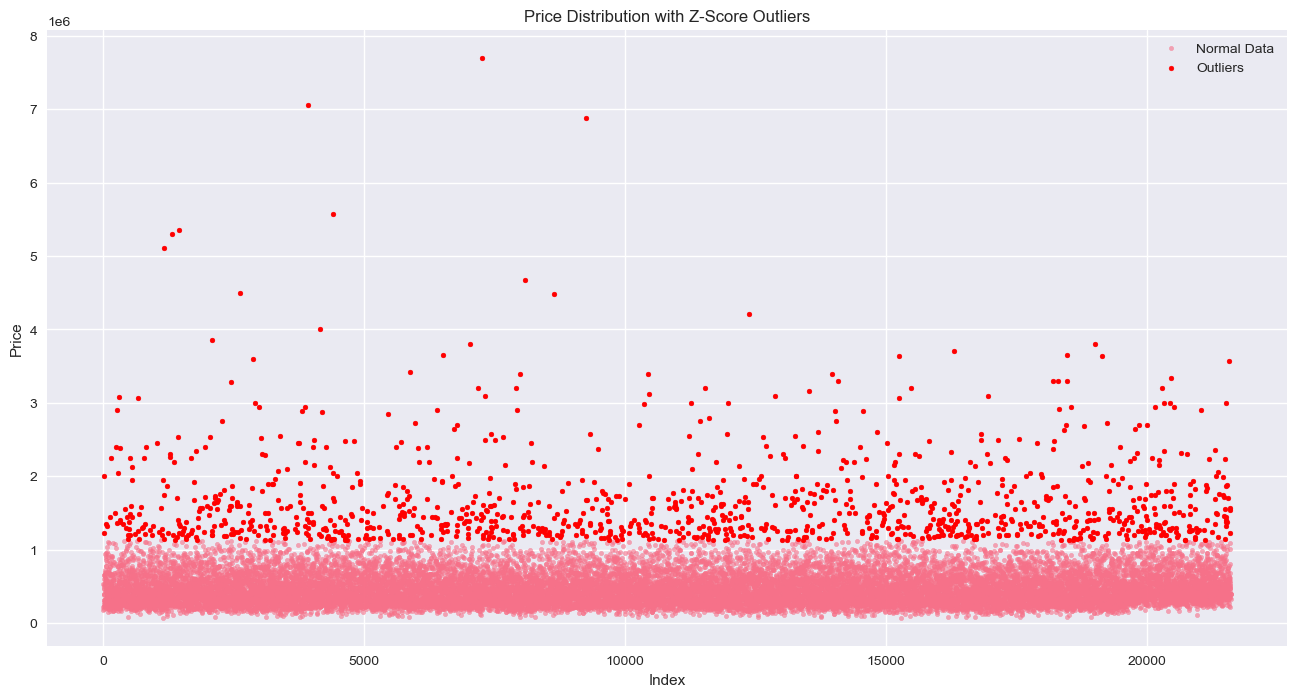

In [825]:
plt.figure(figsize=(16,8))
plt.scatter(df.index, df["price"], label="Normal Data", s=10, alpha=0.6)
plt.scatter(outliers.index, outliers["price"], color='red', label="Outliers", s=12)
plt.title("Price Distribution with Z-Score Outliers")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.show()

In [826]:
outliers = df[df["z_score"].abs() > 2.5]
print(f"Total outliers: {len(outliers)}")

Total outliers: 565


### 3.2 Log Transformation for Price

In [827]:
# Logarithm scaling data for compressing high values
df['price_log'] = np.log(df['price'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score,price_log
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,-0.866697,12.309982
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,-0.005688,13.195614
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,-0.980827,12.100712
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,0.174086,13.311329
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,-0.081956,13.142166


In [828]:
df.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [829]:
df.price_log.describe()

count    21613.000000
mean        13.047817
std          0.526685
min         11.225243
25%         12.682152
50%         13.017003
75%         13.377006
max         15.856731
Name: price_log, dtype: float64

- We can clearly see the differences here on mean: `5.400881e+05` on the original price, and `13.047817` on the logarithm method.

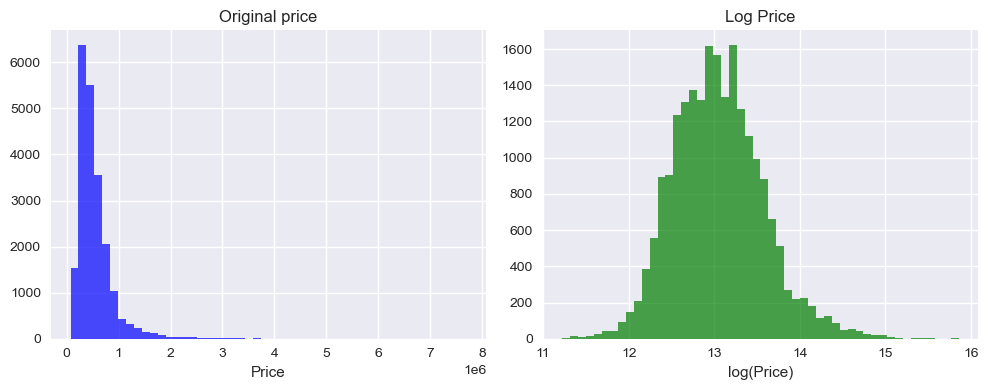

In [830]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(df["price"], bins=50, color="blue", alpha=0.7)
plt.title("Original price")
plt.xlabel("Price")

plt.subplot(1, 2, 2)
plt.hist(df["price_log"], bins=50, color="green", alpha=0.7)
plt.title("Log Price")
plt.xlabel("log(Price)")

plt.tight_layout()
plt.show()

- The original price is strongly right skewed, having values between `0M` and `1M` with a long tail up to `7.7M`. This is really common on prices related data, such as market or selling.

- The normalized price is way more simetrical in a range between `11` and `15` that correspond to prices between `270,000` and `1,000,000`. We still has the right tail and also a left one, but is not that extreme as the original price.

In [831]:
mean_log= df["price_log"].mean()
std_log=  df["price_log"].std()
df["z_score_log"]= (df["price_log"] - mean_log) / std_log

outliers_log = df[abs(df["z_score_log"]) > 3]
print(f"Outliers with original price: {len(outliers_z)}")
print(f"Outliers with log price: {len(outliers_log)}")

Outliers with original price: 565
Outliers with log price: 170


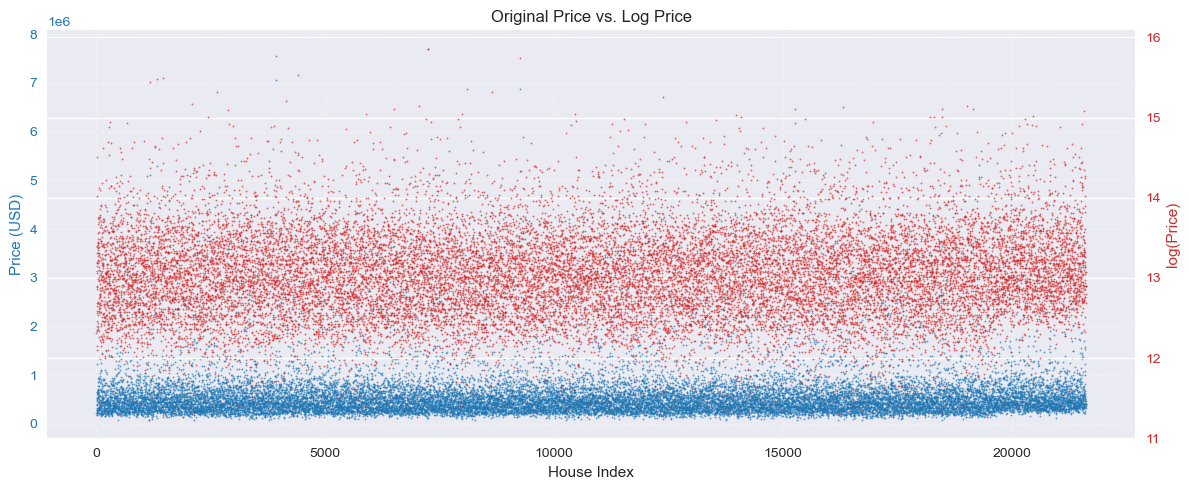

In [832]:
df["price_log"] = np.log(df["price"])

fig, ax1 = plt.subplots(figsize=(12, 5))

color= "tab:blue"
ax1.set_xlabel("House Index")
ax1.set_ylabel("Price (USD)", color=color)
ax1.scatter(df.index, df["price"], color=color, s=1, alpha=0.6, label="Original Price")
ax1.tick_params(axis="y", labelcolor=color)
ax1.grid(True, linestyle="--", alpha=0.3)

ax2= ax1.twinx()
color= "tab:red"
ax2.set_ylabel("log(Price)", color=color)
ax2.scatter(df.index, df["price_log"], color=color, s=1, alpha=0.6, label="Log Price")
ax2.tick_params(axis="y", labelcolor=color)
plt.title("Original Price vs. Log Price")

fig.tight_layout()
plt.show()

When treating the outliers like this, we're getting a better approach to the problem because, as stated before: **we don't need to treat all outliers as bad data just because they have very high values**.  

In this problem, we **can and need to keep these values**, because many of these houses are **"deluxe" or legitimately expensive properties**. At the same time, we also have a large number of normal or affordable houses that naturally pull the distribution toward lower values.  

This causes high-priced homes to appear as statistical outliers—**not due to data errors, but due to real market diversity**. Therefore, they **do not necessarily need to be removed**; instead, we should use robust methods (like log transformation) that preserve their information while reducing their distorting influence on analysis and modeling.

## 4. Machine Learning Models

### 4.1 Functions for testing:

In [833]:
def eval_model(name, y_train_true, y_train_pred, y_test_true, y_test_pred):
  # Training metrics
  mae_train = mean_absolute_error(y_train_true, y_train_pred)
  rmse_train = np.sqrt(mean_squared_error(y_train_true, y_train_pred))
  r2_train = r2_score(y_train_true, y_train_pred)

  # Test metrics
  mae_test = mean_absolute_error(y_test_true, y_test_pred)
  rmse_test = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
  r2_test = r2_score(y_test_true, y_test_pred)

  print(f"{name} metrics:")
  print(f"  Train - MAE: {mae_train:.3f}, RMSE: {rmse_train:.3f}, R²: {r2_train:.3f}")
  print(f"  Test  - MAE: {mae_test:.3f}, RMSE: {rmse_test:.3f}, R²: {r2_test:.3f}")

In [834]:
def predict_house_price_LR(
  bedrooms, bathrooms, sqft_living, sqft_lot, floors,
  waterfront, view, condition, grade, sqft_above, sqft_basement,
  yr_built, yr_renovated, zipcode, lat, long, sqft_living15,
  sqft_lot15, model, scaler, feature_columns
):
  
  input_data= pd.DataFrame([{
    "bedrooms"              : bedrooms,
    "bathrooms"             : bathrooms,
    "sqft_living"           : sqft_living,
    "sqft_lot"              : sqft_lot,
    "floors"                : floors,
    "waterfront"            : waterfront,
    "view"                  : view,
    "condition"             : condition,
    "grade"                 : grade,
    "sqft_above"            : sqft_above,
    "sqft_basement"         : sqft_basement,
    "yr_built"              : yr_built,
    "yr_renovated"          : yr_renovated,
    "zipcode"               : zipcode,
    "lat"                   : lat,
    "long"                  : long,
    "sqft_living15"         : sqft_living15,
    "sqft_lot15"            : sqft_lot15
  }])

  input_data= input_data[feature_columns]

  input_scaled= scaler.transform(input_data)

  log_pred= model.predict(input_scaled)

  return np.exp(log_pred[0])

In [835]:
def predict_house_price_RFR(
  bedrooms, bathrooms, sqft_living, sqft_lot, floors,
  waterfront, view, condition, grade, sqft_above, sqft_basement,
  yr_built, yr_renovated, zipcode, lat, long, sqft_living15,
  sqft_lot15, model, feature_columns
):
  
  input_data= pd.DataFrame([{
    "bedrooms"              : bedrooms,
    "bathrooms"             : bathrooms,
    "sqft_living"           : sqft_living,
    "sqft_lot"              : sqft_lot,
    "floors"                : floors,
    "waterfront"            : waterfront,
    "view"                  : view,
    "condition"             : condition,
    "grade"                 : grade,
    "sqft_above"            : sqft_above,
    "sqft_basement"         : sqft_basement,
    "yr_built"              : yr_built,
    "yr_renovated"          : yr_renovated,
    "zipcode"               : zipcode,
    "lat"                   : lat,
    "long"                  : long,
    "sqft_living15"         : sqft_living15,
    "sqft_lot15"            : sqft_lot15
  }])
  
  input_data= input_data[feature_columns]
  log_pred=   model.predict(input_data)[0]
  price_pred= np.expm1(log_pred)
  return price_pred

In [836]:
def predict_house_price_ADA(
  bedrooms, bathrooms, sqft_living, sqft_lot, floors,
  waterfront, view, condition, grade, sqft_above, sqft_basement,
  yr_built, yr_renovated, zipcode, lat, long, sqft_living15,
  sqft_lot15, model, feature_columns
):
  
  input_data = pd.DataFrame([{
    "bedrooms"      : bedrooms,
    "bathrooms"     : bathrooms,
    "sqft_living"   : sqft_living,
    "sqft_lot"      : sqft_lot,
    "floors"        : floors,
    "waterfront"    : waterfront,
    "view"          : view,
    "condition"     : condition,
    "grade"         : grade,
    "sqft_above"    : sqft_above,
    "sqft_basement" : sqft_basement,
    "yr_built"      : yr_built,
    "yr_renovated"  : yr_renovated,
    "zipcode"       : zipcode,
    "lat"           : lat,
    "long"          : long,
    "sqft_living15" : sqft_living15,
    "sqft_lot15"    : sqft_lot15
  }])
  
  input_data = input_data[feature_columns]
  log_pred = model.predict(input_data)[0]
  price_pred = np.expm1(log_pred)
  return price_pred

In [837]:
def predict_house_price_XGB(
  bedrooms, bathrooms, sqft_living, sqft_lot, floors,
  waterfront, view, condition, grade, sqft_above, sqft_basement,
  yr_built, yr_renovated, zipcode, lat, long, sqft_living15,
  sqft_lot15, model, feature_columns
):
  
  input_data = pd.DataFrame([{
    "bedrooms"      : bedrooms,
    "bathrooms"     : bathrooms,
    "sqft_living"   : sqft_living,
    "sqft_lot"      : sqft_lot,
    "floors"        : floors,
    "waterfront"    : waterfront,
    "view"          : view,
    "condition"     : condition,
    "grade"         : grade,
    "sqft_above"    : sqft_above,
    "sqft_basement" : sqft_basement,
    "yr_built"      : yr_built,
    "yr_renovated"  : yr_renovated,
    "zipcode"       : zipcode,
    "lat"           : lat,
    "long"          : long,
    "sqft_living15" : sqft_living15,
    "sqft_lot15"    : sqft_lot15
  }])
  
  input_data = input_data[feature_columns]
  log_pred = model.predict(input_data)[0]
  price_pred = np.expm1(log_pred)
  return price_pred

### 4.2 Linear Regression

#### Creating the Model

In [838]:
X, y, y_nn= df.drop(columns=["id", "date", "price", "price_log", "z_score", "z_score_log"]), df["price_log"], df["price"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [839]:
model_lr = LinearRegression()
scaler = StandardScaler()

In [840]:

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_lr.fit(X_train_scaled, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [841]:
y_train_pred= model_lr.predict(X_train_scaled)
y_test_pred=  model_lr.predict(X_test_scaled)

eval_model(
  "Linear Regression",
  y_train, y_train_pred,
  y_test, y_test_pred
)

Linear Regression metrics:
  Train - MAE: 0.195, RMSE: 0.252, R²: 0.770
  Test  - MAE: 0.196, RMSE: 0.255, R²: 0.771


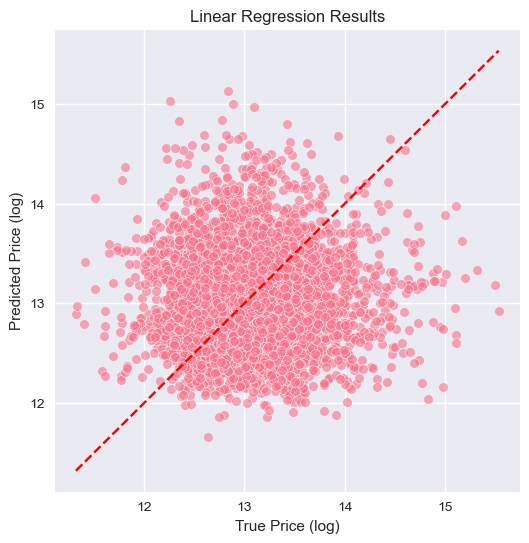

In [842]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("True Price (log)")
plt.ylabel("Predicted Price (log)")
plt.title("Linear Regression Results")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.show()

#### Predict Test

In [843]:
feature_columns= [
  "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
  "waterfront", "view", "condition", "grade", "sqft_above",
  "sqft_basement", "yr_built", "yr_renovated", "zipcode",
  "lat", "long", "sqft_living15", "sqft_lot15"
]

In [844]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score,price_log,z_score_log
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,-0.866697,12.309982,-1.400905


In [845]:
p= predict_house_price_LR(
  bedrooms= 3,       bathrooms= 1.0,       sqft_living= 1180,
  sqft_lot= 5650,    floors= 1.0,          waterfront= 0,
  view= 0,           condition= 3,         grade= 7,
  sqft_above= 1180,  sqft_basement= 0,     yr_built= 1995,
  yr_renovated= 0,   zipcode= 98178,       lat= 47.51,
  long= -122.26,     sqft_living15= 1340,  sqft_lot15= 5650,
  model= model_lr,   scaler= scaler,       feature_columns= feature_columns
)
print(f"The predicted price of the house using Linear Regression is: {p:.0f}")

The predicted price of the house using Linear Regression is: 237903


### 4.3 Random Forest Regression

#### Creating the Model

In [846]:
X, y= df.drop(columns=["id", "date", "price", "price_log", "z_score", "z_score_log"]), df["price_log"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [847]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [848]:
y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

eval_model(
  "Linear Regression",
  y_train, y_train_pred,
  y_test, y_test_pred
)

Linear Regression metrics:
  Train - MAE: 0.048, RMSE: 0.071, R²: 0.982
  Test  - MAE: 0.126, RMSE: 0.178, R²: 0.889


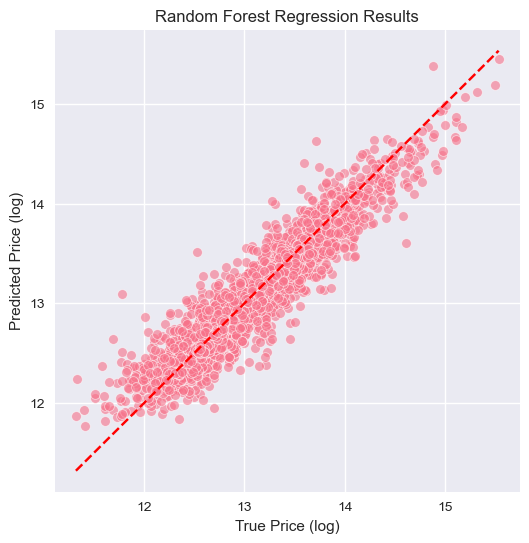

In [849]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel("True Price (log)")
plt.ylabel("Predicted Price (log)")
plt.title("Random Forest Regression Results")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.show()

#### Predict test

In [850]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score,price_log,z_score_log
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,-0.866697,12.309982,-1.400905


In [851]:
rfr_predict= predict_house_price_RFR(
  bedrooms= 3,       bathrooms= 1.0,       sqft_living= 1180,
  sqft_lot= 5650,    floors= 1.0,          waterfront= 0,
  view= 0,           condition= 3,         grade= 7,
  sqft_above= 1180,  sqft_basement= 0,     yr_built= 1995,
  yr_renovated= 0,   zipcode= 98178,       lat= 47.51,
  long= -122.26,     sqft_living15= 1340,  sqft_lot15= 5650,
  model= model_rf,  feature_columns=      feature_columns,
)

print(f"The predicted price of the house using Random Forest Regression is: {rfr_predict:.0f}")

The predicted price of the house using Random Forest Regression is: 224566


### 4.4 AdaBoost Regression

#### Creating the Model

In [852]:
X, y= df.drop(columns=["id", "date", "price", "price_log", "z_score", "z_score_log"]), df["price_log"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [853]:
model_ADA = AdaBoostRegressor(random_state=42)
model_ADA.fit(X_train, y_train)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,loss,'linear'
,random_state,42


In [854]:
y_train_pred = model_ADA.predict(X_train)
y_test_pred = model_ADA.predict(X_test)

eval_model(
  "Linear Regression",
  y_train, y_train_pred,
  y_test, y_test_pred
)

Linear Regression metrics:
  Train - MAE: 0.203, RMSE: 0.258, R²: 0.758
  Test  - MAE: 0.204, RMSE: 0.261, R²: 0.761


#### Predict test

In [855]:
p= predict_house_price_ADA(
  bedrooms= 3,       bathrooms= 1.0,       sqft_living= 1180,
  sqft_lot= 5650,    floors= 1.0,          waterfront= 0,
  view= 0,           condition= 3,         grade= 7,
  sqft_above= 1180,  sqft_basement= 0,     yr_built= 1995,
  yr_renovated= 0,   zipcode= 98178,       lat= 47.51,
  long= -122.26,     sqft_living15= 1340,  sqft_lot15= 5650,
  model= model_ADA,  feature_columns= feature_columns
)
print(f"The predicted price of the house using ADA Boost Regression is: {p:.0f}")

The predicted price of the house using ADA Boost Regression is: 266391


### 4.5 XGBoost Regression

#### Creating Model

In [856]:
X, y= df.drop(columns=["id", "date", "price", "price_log", "z_score", "z_score_log"]), df["price_log"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 69)

In [857]:
model_XGB = XGBRegressor(random_state=42)
model_XGB.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [858]:
y_train_pred = model_XGB.predict(X_train)
y_test_pred = model_XGB.predict(X_test)

eval_model(
  "Linear Regression",
  y_train, y_train_pred,
  y_test, y_test_pred
)

Linear Regression metrics:
  Train - MAE: 0.081, RMSE: 0.110, R²: 0.956
  Test  - MAE: 0.119, RMSE: 0.167, R²: 0.904


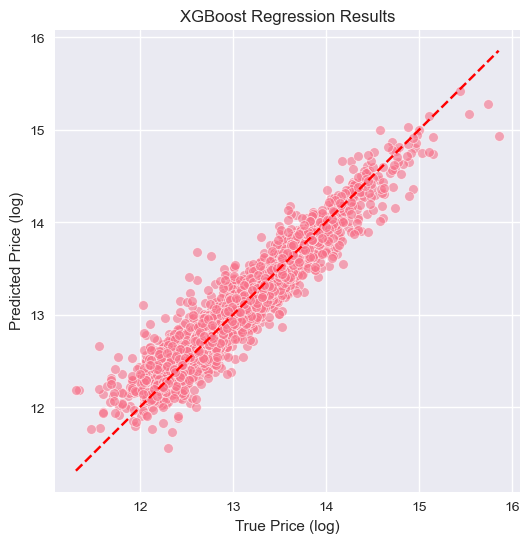

In [859]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel("True Price (log)")
plt.ylabel("Predicted Price (log)")
plt.title("XGBoost Regression Results")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.show()

#### Predict test

In [860]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score,price_log,z_score_log
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,-0.866697,12.309982,-1.400905


In [861]:
p= predict_house_price_XGB(
  bedrooms= 3,       bathrooms= 1.0,       sqft_living= 1180,
  sqft_lot= 5650,    floors= 1.0,          waterfront= 0,
  view= 0,           condition= 3,         grade= 7,
  sqft_above= 1180,  sqft_basement= 0,     yr_built= 1995,
  yr_renovated= 0,   zipcode= 98178,       lat= 47.51,
  long= -122.26,     sqft_living15= 1340,  sqft_lot15= 5650,
  model= model_XGB,  feature_columns= feature_columns
)
print(f"The predicted price of the house using Linear Regression is: {p:.0f}")

The predicted price of the house using Linear Regression is: 241401


## 5. Models Tunning

### 5.1 Random Forest Tunning

In [862]:
model_rf = RandomForestRegressor( n_estimators=800,
                                 max_depth=20,
                                 min_samples_split=5,
                                 min_samples_leaf=2,
                                 max_features="sqrt",
                                 random_state=42,
                                 n_jobs=-1
                                 )

model_rf.fit(X_train, y_train)
y_pred= model_rf.predict(X_test)
eval_model(
  "Random Forest",
  y_train, y_train_pred,
  y_test, y_test_pred
)

Random Forest metrics:
  Train - MAE: 0.081, RMSE: 0.110, R²: 0.956
  Test  - MAE: 0.119, RMSE: 0.167, R²: 0.904


### 5.2 XGBoost Tunning

In [863]:
model_XGB = XGBRegressor(random_state=42)
model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)
eval_model

eval_model(
  "XGBR",
  y_train, y_train_pred,
  y_test, y_test_pred
)

XGBR metrics:
  Train - MAE: 0.081, RMSE: 0.110, R²: 0.956
  Test  - MAE: 0.119, RMSE: 0.167, R²: 0.904


### 5.3 Final Model Comparison

In [864]:
# Dictionary to store comparison metrics for all models
models_comparison = {}

# Linear Regression predictions and metrics
y_pred_lr = model.predict(X_test_scaled)  # Predict using linear regression
models_comparison['Linear Regression'] = {
    'MAE': mean_absolute_error(y_test, y_pred_lr),  # Mean Absolute Error
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr)),  # Root Mean Squared Error
    'R2': r2_score(y_test, y_pred_lr)  # R-squared score
}

# Random Forest predictions and metrics
y_pred_rf = model_rf.predict(X_test)  # Predict using random forest
models_comparison['Random Forest'] = {
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'R2': r2_score(y_test, y_pred_rf)
}

# AdaBoost predictions and metrics
y_pred_ada = model_ADA.predict(X_test)  # Predict using AdaBoost
models_comparison['AdaBoost'] = {
    'MAE': mean_absolute_error(y_test, y_pred_ada),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ada)),
    'R2': r2_score(y_test, y_pred_ada)
}

# XGBoost tuned predictions and metrics
models_comparison['XGBoost'] = {
    'MAE': mean_absolute_error(y_test, y_pred_xgb_tuned),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned)),
    'R2': r2_score(y_test, y_pred_xgb_tuned)
}

# Create DataFrame for easy comparison of all models
comparison_df = pd.DataFrame(models_comparison).T

# Display comparison results
print("="*50)
print("FINAL MODEL COMPARISON")
print("="*50)
display(comparison_df.round(4))  # Show DataFrame with 4 decimal places

FINAL MODEL COMPARISON


,MAE,RMSE,R2
Linear Regression,0.5619,0.7235,-0.7989
Random Forest,0.1250,0.1772,0.8921
AdaBoost,0.2041,0.2592,0.7691
XGBoost,0.5826,0.7442,-0.9030


## Feature Engineering

In [865]:
corr_data= df.drop(columns=["id", "date", "price", "z_score", "z_score_log"])
corr_data.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982


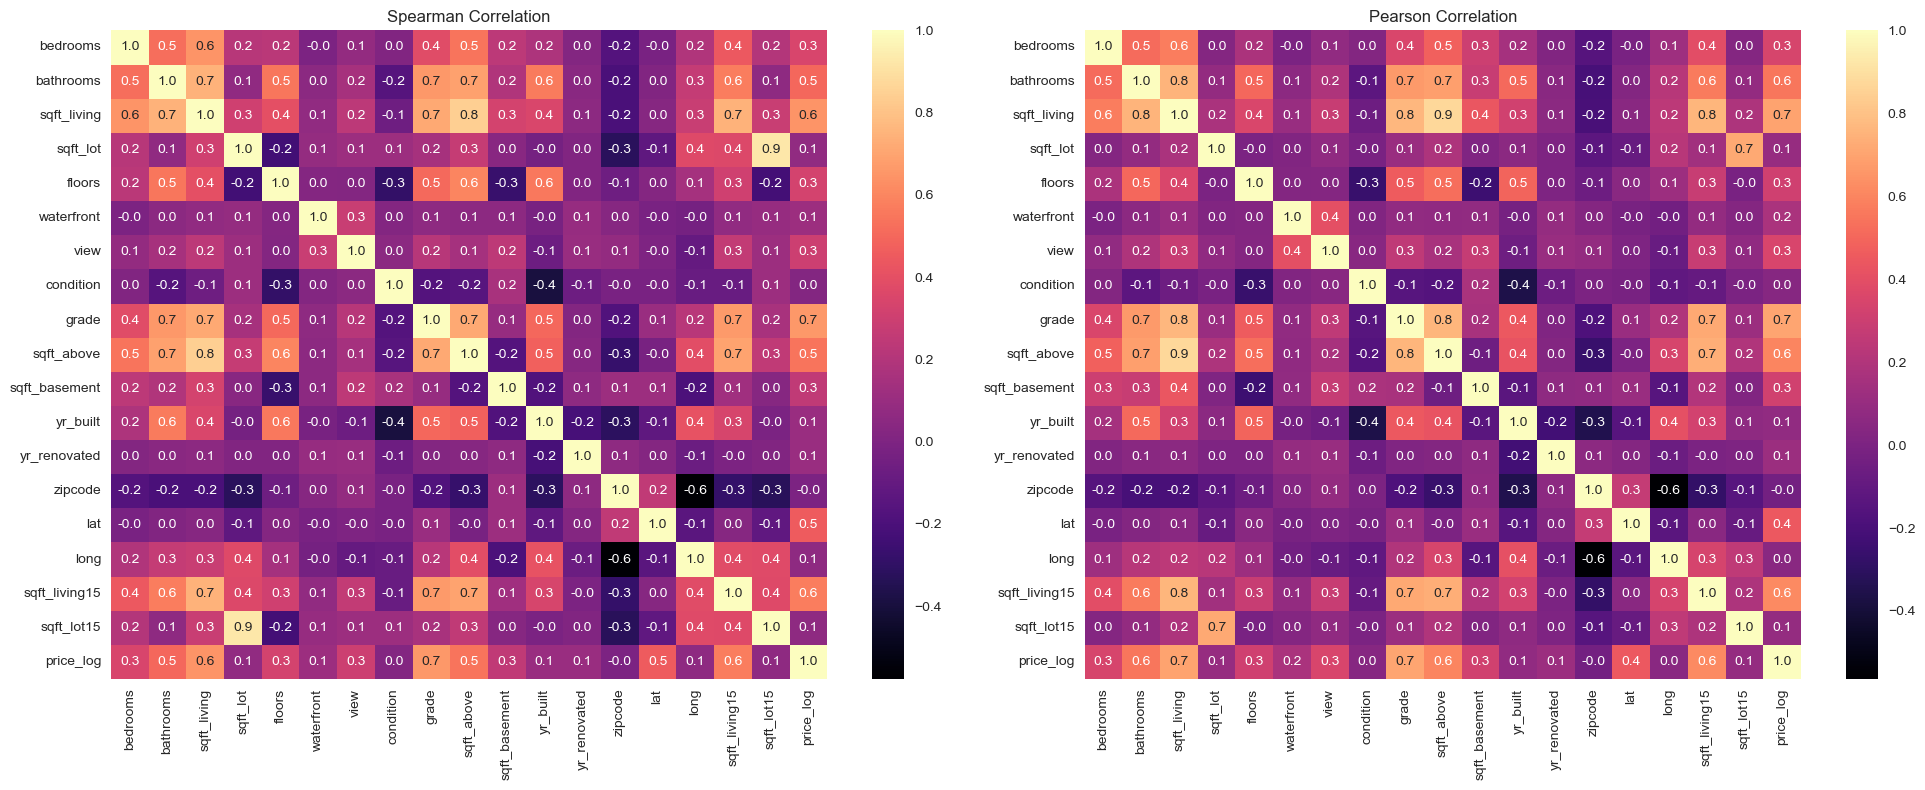

In [866]:
corr_pear, corr_spear= corr_data.corr(method="pearson"), corr_data.corr(method="spearman")
plot_correlations(corr_spear, corr_pear)

> We just want to check what values are the most valuable to take good insights and do some feature tuning

### Discovering features

We want to explore by each feature and see the score so who is the best to choose for feature tuning and feature engineering

In [867]:
selected_features= ["bedrooms", "bathrooms", "sqft_living", "floors", "view", "grade", 
                     "sqft_above", "sqft_basement", "lat", "sqft_living15"]
df_model= df[selected_features+ ["price_log"]]
df_model.head(1)

,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,lat,sqft_living15,price_log
0,3,1.0,1180,1.0,0,7,1180,0,47.5112,1340,12.309982


In [868]:
# SELECTED COLUMNS
X_top, y_top= df[selected_features], df["price_log"]
X_train, X_test, y_train, y_test= train_test_split(X_top, y_top, test_size= 0.2, random_state= 69)

In [869]:
# create a new columns called month, it'll be categorical.
df["date"]=  pd.to_datetime(df["date"], errors="coerce")
df["month"]= df["date"].dt.month.astype("category")

In [870]:
# creating a modern house vaiable instead of using yr_built | 1 for modern, 0 for old
df["modern_house"] = (df["yr_built"] >= 2000).astype(int)

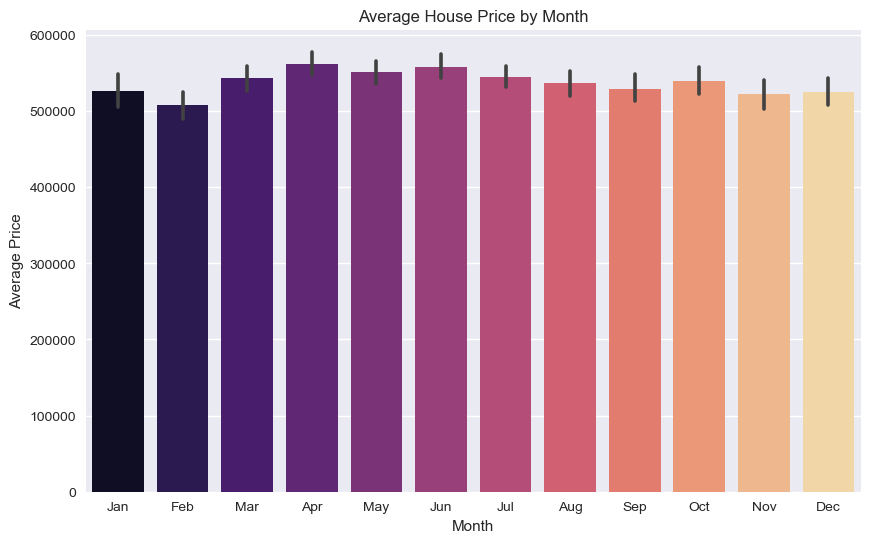

In [871]:
plt.figure(figsize=(10, 6))
sns.barplot(
  x="month",
  y="price",
  data=df,
  estimator=np.mean,
  palette="magma"
)
plt.title("Average House Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.xticks(range(0, 12), 
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


In [872]:
corr_month= df[["month", "price_log"]].corr().iloc[0, 1]
print(f"Correlation between month and log(price): {corr_month:.4f}")

Correlation between month and log(price): -0.0131


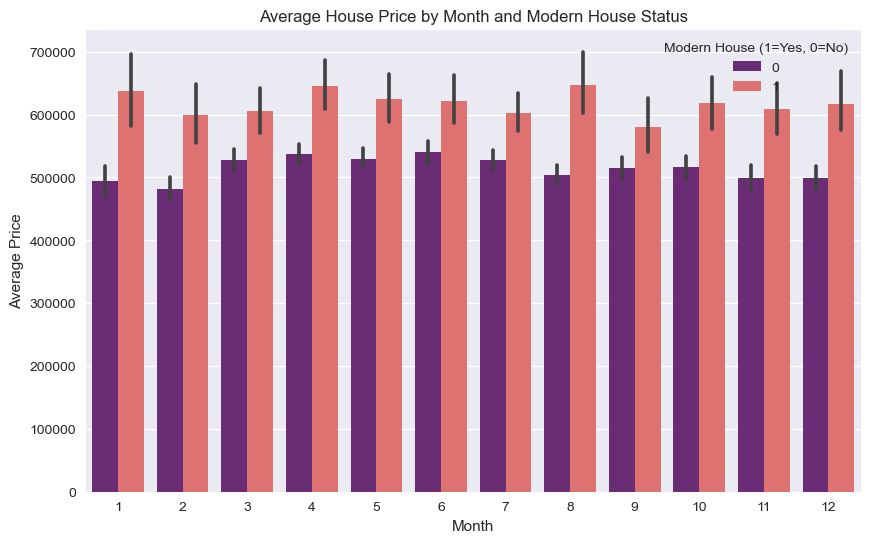

In [873]:
plt.figure(figsize=(10, 6))
sns.barplot(
  x="month",
  y="price",
  hue="modern_house",
  data=df,
  palette="magma"
)
plt.title("Average House Price by Month and Modern House Status")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.legend(title="Modern House (1=Yes, 0=No)")
plt.show()

In [874]:
# 1 == was renovated | 0 == was not renovated
df["was_renovated"] = (df["yr_renovated"] > 0).astype(int)

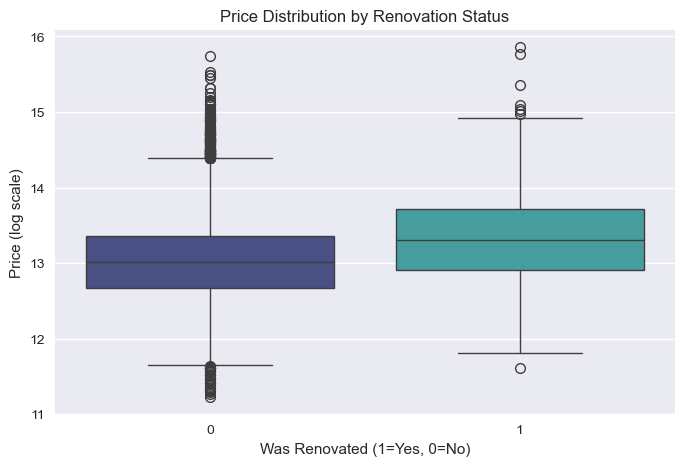

In [875]:
plt.figure(figsize=(8, 5))
sns.boxplot(
  x="was_renovated",
  y="price_log",
  data=df,
  palette="mako"
)
plt.title("Price Distribution by Renovation Status")
plt.xlabel("Was Renovated (1=Yes, 0=No)")
plt.ylabel("Price (log scale)")
plt.show()

In [876]:
# We are gonna take all columns bc xgbr handles very very good atypic values
X, y= df.drop(columns=["id", "date", "price", "price_log", "z_score", "z_score_log", "yr_built"]), df["price_log"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 69)

In [877]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,z_score,price_log,z_score_log,month,modern_house,was_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,47.5112,-122.257,1340,5650,-0.866697,12.309982,-1.400905,10,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,47.7210,-122.319,1690,7639,-0.005688,13.195614,0.280618,12,0,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,47.7379,-122.233,2720,8062,-0.980827,12.100712,-1.798239,2,0,0


In [878]:
num_cols= [
  "bathrooms", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement",
  "lat", "long", "sqft_living15", "sqft_lot15"
]

In [879]:
cat_cols= [
  "bedrooms", "floors", "waterfront", "view", "condition", "grade",
  "zipcode", "month", "modern_house", "was_renovated"
]

In [880]:
df[num_cols].head(1)

,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,1.0,1180,5650,1180,0,47.5112,-122.257,1340,5650


In [881]:
df[cat_cols].head(1)

,bedrooms,floors,waterfront,view,condition,grade,zipcode,month,modern_house,was_renovated
0,3,1.0,0,0,3,7,98178,10,0,0


In [882]:
# We use Colunmns Transformer to transform our cat cols (with one hot encoder) to data our model can use (we are gonna be using pipeline)
feature_engineering_transformer= ColumnTransformer([
  ("categorical", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
  ("numeric", "passthrough", num_cols)
])

In [883]:
# We use pipeline to use our feature_engineering_transformer and apply it to our model directly.
model_XGB= Pipeline([
  ("feature_engineering", feature_engineering_transformer),
  ("regressor", XGBRegressor(
    n_estimators=     214,
    learning_rate=    0.03,
    max_depth=        6,
    subsample=        0.75,
    colsample_bytree= 0.75,
    reg_alpha=        0.2,
    reg_lambda=       0.8,
    gamma=            0.07,
    n_jobs=          -1,
    random_state=     69
  ))
])

| **Hyperparameter**                 | **Value** | **Description**                                                                                                         |
| ---------------------------------- | --------- | ----------------------------------------------------------------------------------------------------------------------- |
| **n_estimators**                   | 214       | Number of trees the model builds. More trees can improve accuracy but also increase training time and overfitting risk. |
| **learning_rate**                  | 0.03      | Controls how much each tree contributes to the final prediction. A smaller value means slower but more stable learning. |
| **max_depth**                      | 6         | Maximum depth of each decision tree. Higher values allow more complex relationships but may overfit.                    |
| **subsample**                      | 0.75      | Fraction of training data used to build each tree. Helps prevent overfitting by adding randomness.                      |
| **colsample_bytree**               | 0.75      | Fraction of features randomly selected for each tree. Encourages diversity between trees and improves generalization.   |
| **reg_alpha (L1 regularization)**  | 0.2       | Penalizes large feature weights, promoting sparsity and helping with feature selection.                                 |
| **reg_lambda (L2 regularization)** | 0.8       | Penalizes overly complex models by shrinking feature weights, reducing overfitting.                                     |
| **gamma**                          | 0.07      | Minimum loss reduction needed to make a split. Larger values make the model more conservative.                          |
| **n_jobs**                         | -1        | Uses all available CPU cores to speed up training.                                                                      |
| **random_state**                   | 69        | Ensures the model’s results are reproducible every time it runs.                                                        |

**ColumnTransformer:**
Applies different preprocessing to different column types.
Here, it applies **OneHotEncoder** to categorical columns and passes numeric columns unchanged.

**OneHotEncoder:**
Converts categorical features (e.g., “zipcode”, “month”) into binary indicator variables so the model can interpret them.

**Pipeline:**
Chains preprocessing and modeling steps together into one workflow.

In [884]:
drop_cols= ["id", "date", "price", "z_score", "price_log", "z_score_log", "yr_built", "yr_renovated"]

X, y= df.drop(columns=drop_cols), df["price_log"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 69)

In [885]:
X.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month,modern_house,was_renovated
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,10,0,0


In [888]:
model_XGB.fit(X_train, y_train)

,steps,"[('feature_engineering', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('categorical', ...), ('numeric', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [890]:
y_train_pred= model_XGB.predict(X_train)
y_test_pred=  model_XGB.predict(X_test)

eval_model(
  "XGBR tuned - Pipeline",
  y_train, y_train_pred,
  y_test, y_test_pred
)

XGBR tuned - Pipeline metrics:
  Train - MAE: 0.110, RMSE: 0.150, R²: 0.918
  Test  - MAE: 0.123, RMSE: 0.170, R²: 0.901


- R² of 0.918 on train → don't overfit nearly much, this is actually a very good metric
- R² of 0.901 on test →  has a good improvement outside the test; very good number.
- MAE and MSE lows → very very good predictions.